## Objective - Improve customer experience by analysing sales data and Increase Revenue

In [1]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data set
df = pd.read_csv('Diwali Sales Data.csv',encoding = 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# drop unrelated/blank columns
df.drop(['Status','unnamed1'],axis=1,inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
# sum all null value
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Filter rows with at least one null value
rows_with_nulls = df[df.isnull().any(axis=1)]
print("rows with null values:")
print(rows_with_nulls)

rows with null values:
     User_ID Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
7    1002092  Shivangi  P00273442      F       55+   61               0   
14   1003858      Cano  P00293742      M     46-50   46               1   
16   1005447       Amy  P00275642      F     46-50   48               1   
109  1005265    Sakshi  P00296242      F     46-50   48               1   
111  1005261   Apoorva  P00057942      F     36-45   41               1   
184  1005538    Kartik  P00269542      F     46-50   49               1   
293  1000326  Jonathan  P00120542      M     51-55   53               0   
344  1002507   Lakshmi  P00045842      F     26-35   35               1   
345  1004498   Srishti  P00030842      F     51-55   55               0   
452  1004601    Gaurav  P00014442      F     36-45   40               1   
464  1004528    Anurag  P00338442      F     26-35   33               1   
493  1002994    Hemant   P0009942      F     36-45   38               0   

 

In [10]:
# Calculate mean of each value and fill NA with mean for that category
df['Amount']= df.groupby('Product_Category')['Amount'].transform(lambda x: x.fillna(x.mean()))

In [11]:
selected_row = df[(df['User_ID']==1004601) & (df['Product_ID']=='P00014442')]
print(selected_row)

     User_ID Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
452  1004601    Gaurav  P00014442      F     36-45   40               1   

              State     Zone   Occupation Product_Category  Orders  \
452  Madhya Pradesh  Central  Hospitality             Food       4   

           Amount  
452  13628.065663  


In [12]:
# to see if still we have null values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [13]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [14]:
df['Amount'].dtypes

dtype('int32')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.454626
std,1.716125e+03,12.754122,0.493632,1.115047,5224.434220
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
# use specific columns to describe
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.454626
std,12.754122,1.115047,5224.434220
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


## EDA - Exploratory Data Analysis

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Gender

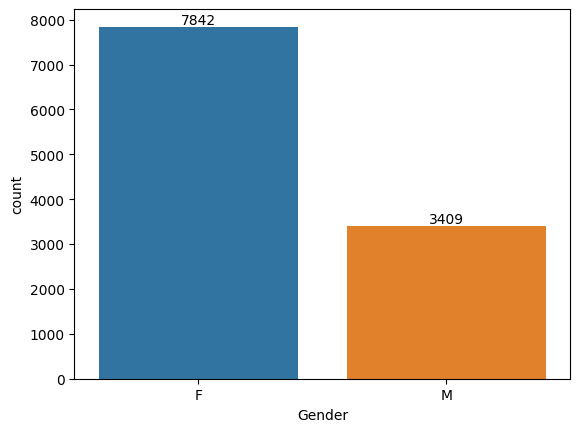

In [19]:
# plotting a bar chart for gender and it's count
ax = sns.countplot(x='Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

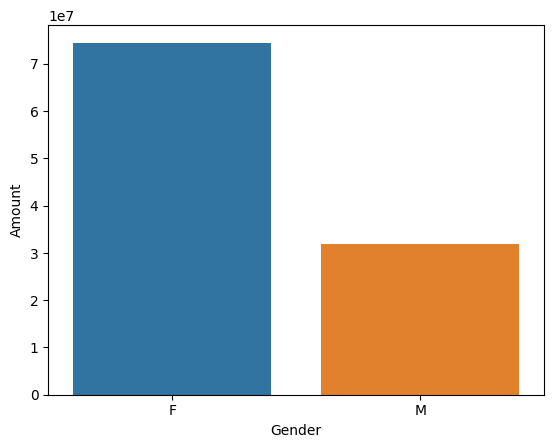

In [20]:
# plotting a bar chart for gender vs total amount
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x = 'Gender',y='Amount',data = sales_gen)

for bars in ax.containers:
    ax.bar_label(bars)

*From above graph we can say most of the buyers are female and even the purchasing power of female is higherthan men*

## AGE

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

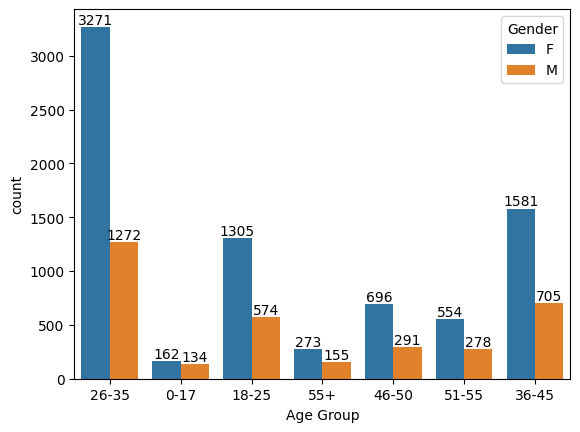

In [22]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

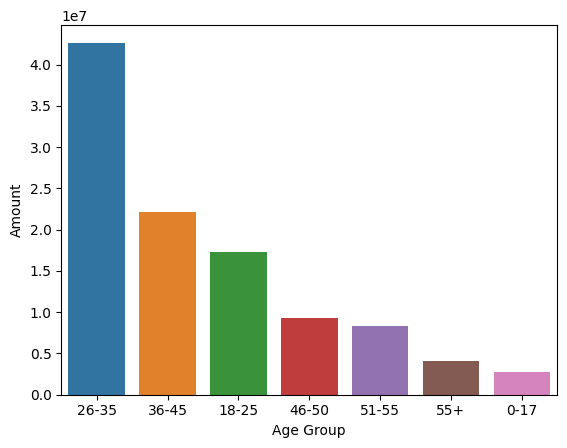

In [23]:
# Total amount vs Age Group

sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

<Axes: xlabel='Age Group', ylabel='Amount'>

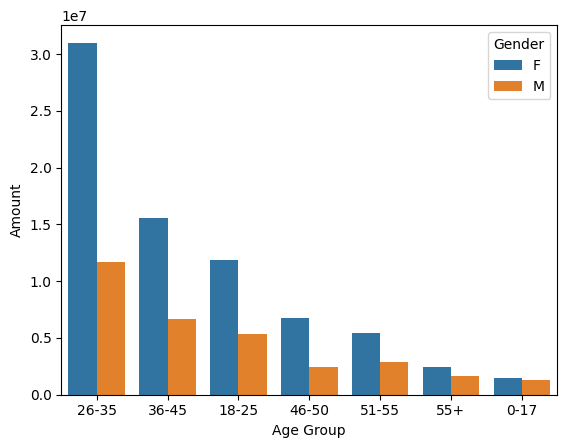

In [24]:
# Total amount vs Age Group on the basis of gender

# grouping of age group o the basis og gender and getting sum of amount
sales_age_gender = df.groupby(['Age Group', 'Gender'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

# visualisation
sns.barplot(x='Age Group',y = 'Amount', hue = 'Gender', data = sales_age_gender)

*From above graph we can say that most of the buyers are in the age group of 26-35 years female*

## State

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

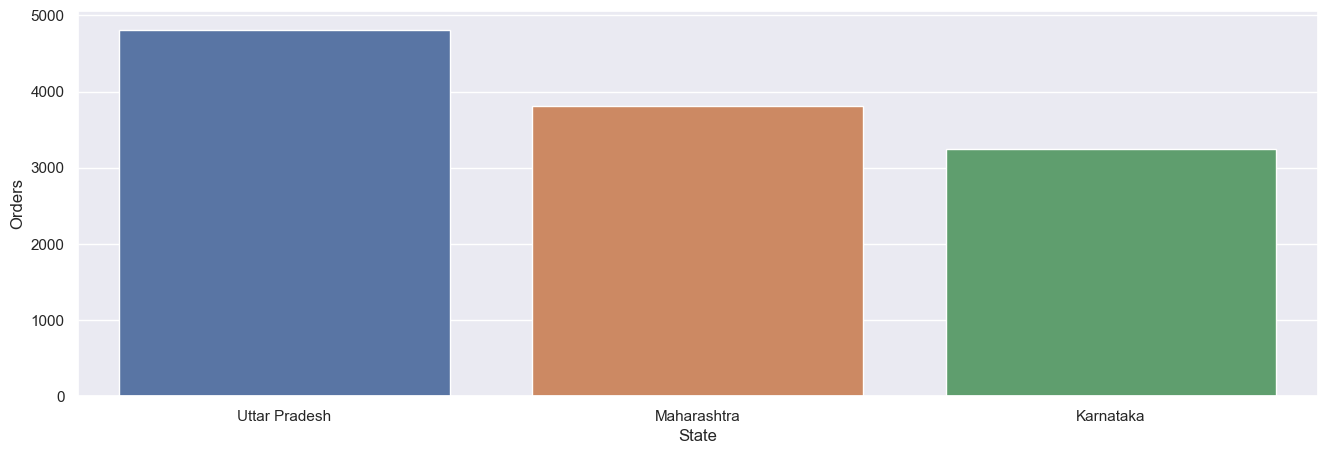

In [26]:
# total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(3)

sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(x = 'State', y = 'Orders', data= sales_state)

<Axes: xlabel='State', ylabel='Amount'>

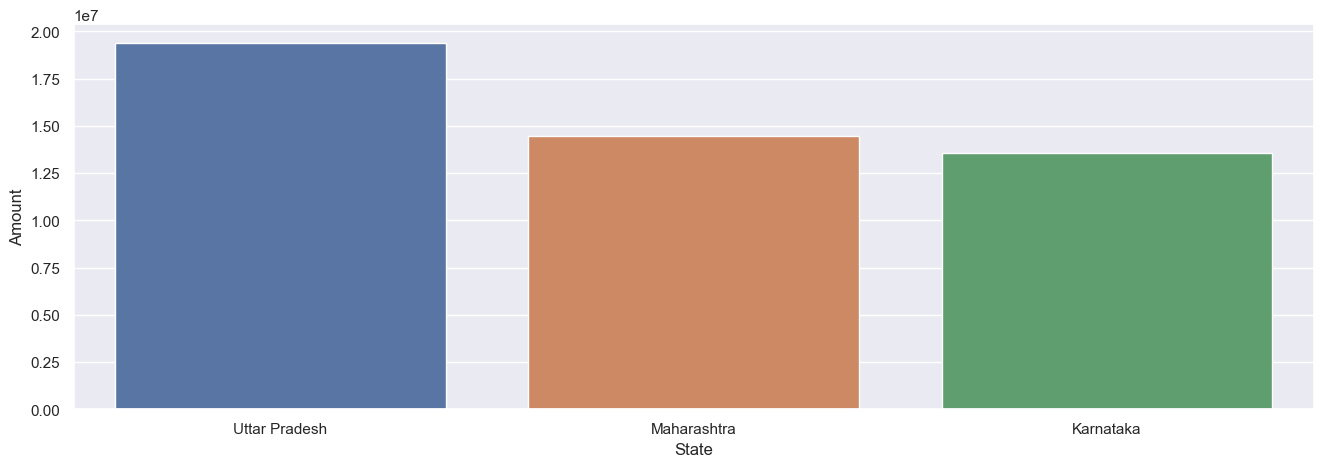

In [27]:
# total amount/sales for top 10 states

sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(3)

sns.set(rc = {'figure.figsize': (16,5)})
sns.barplot(x = 'State', y = 'Amount', data = sales_state)

*From above graph we can see most of the orders and total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

## Marital Status

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

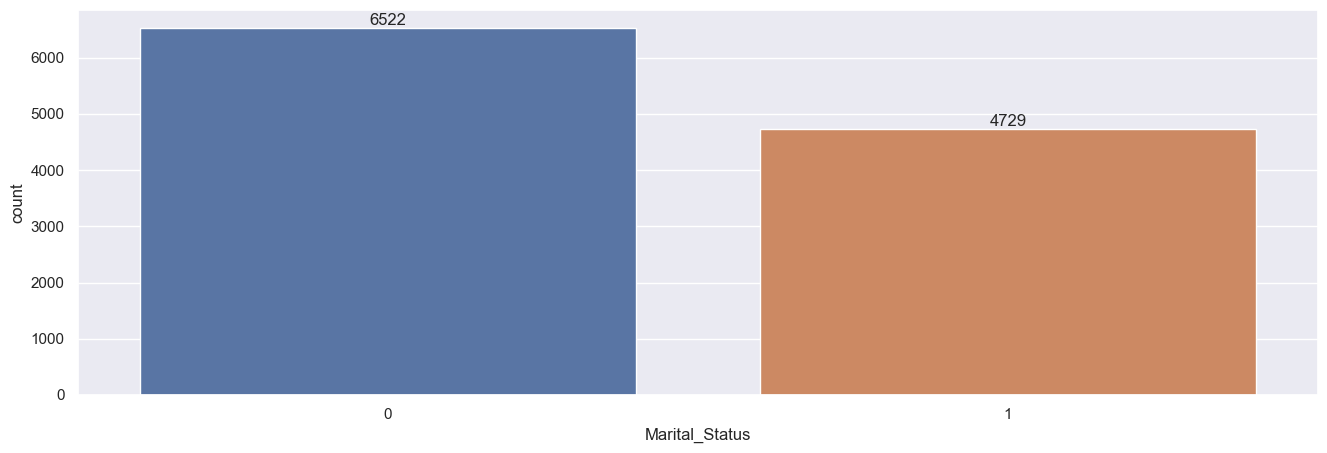

In [29]:
# countplot for marital status (0 is married, 1 is unmarried)
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc = {'figure.figsize': (7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

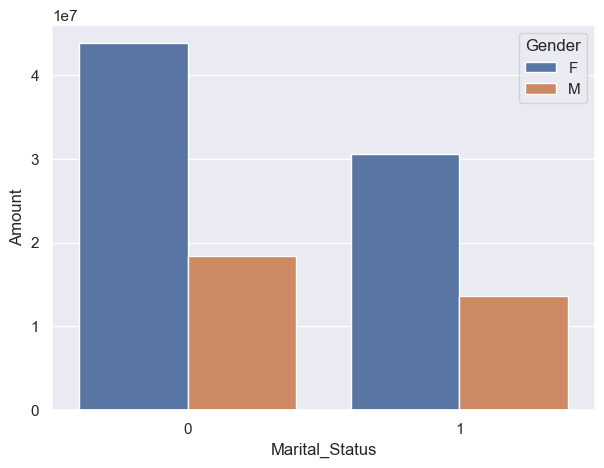

In [30]:
# gender contribution in marital status

sales_marital_status = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Marital_Status', y = 'Amount', hue = 'Gender', data = sales_marital_status)

*From above grapg we can say most of the buyers are married (women) and they have high purchasing power*

In [31]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Occupation

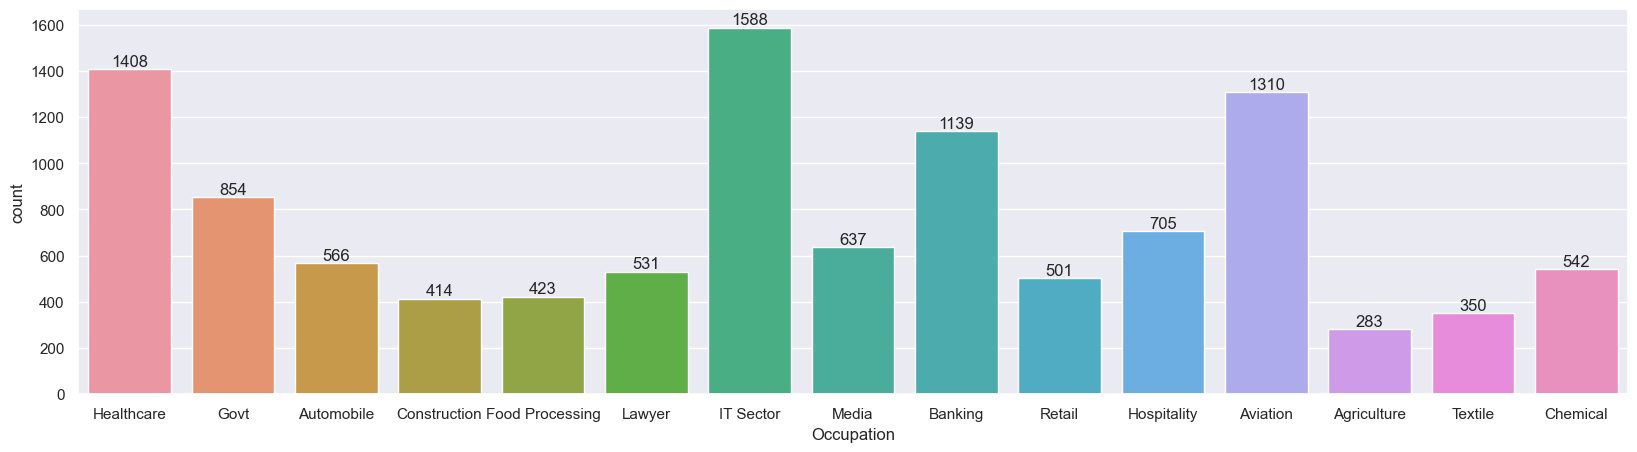

In [32]:
# countplot of occupation column
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(x = 'Occupation', data = df)

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

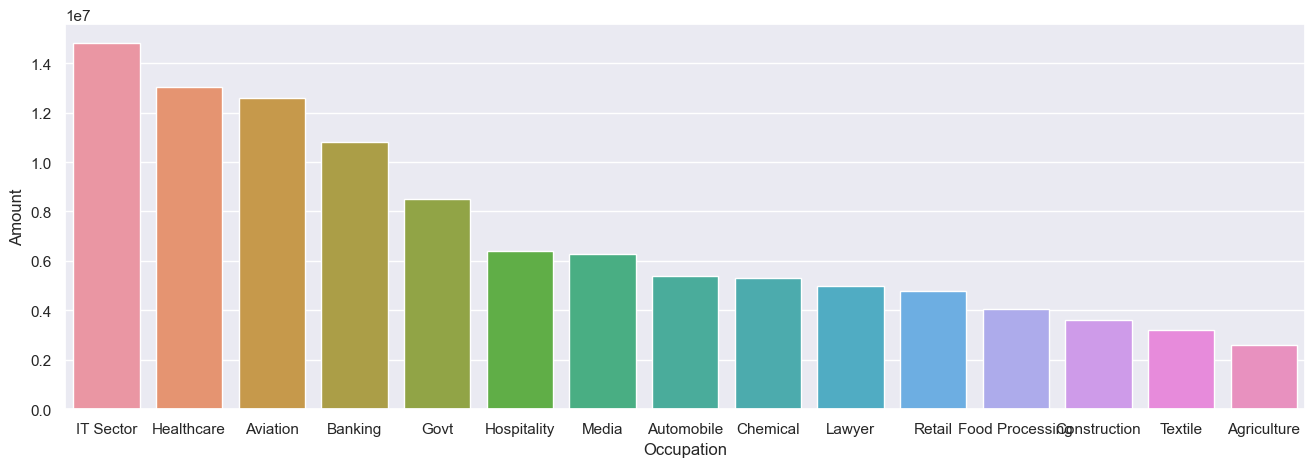

In [33]:
# purchasing power of Occupation section
sales_occup = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc = {'figure.figsize': (16,5)})
sns.barplot(x = 'Occupation', y = 'Amount', data = sales_occup)

*From above graph we can say that people with occupation in IT Sector, Healthcare and Avaiation are buying the most products and having high purchasing power than other occupations*

## Product Category

In [34]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

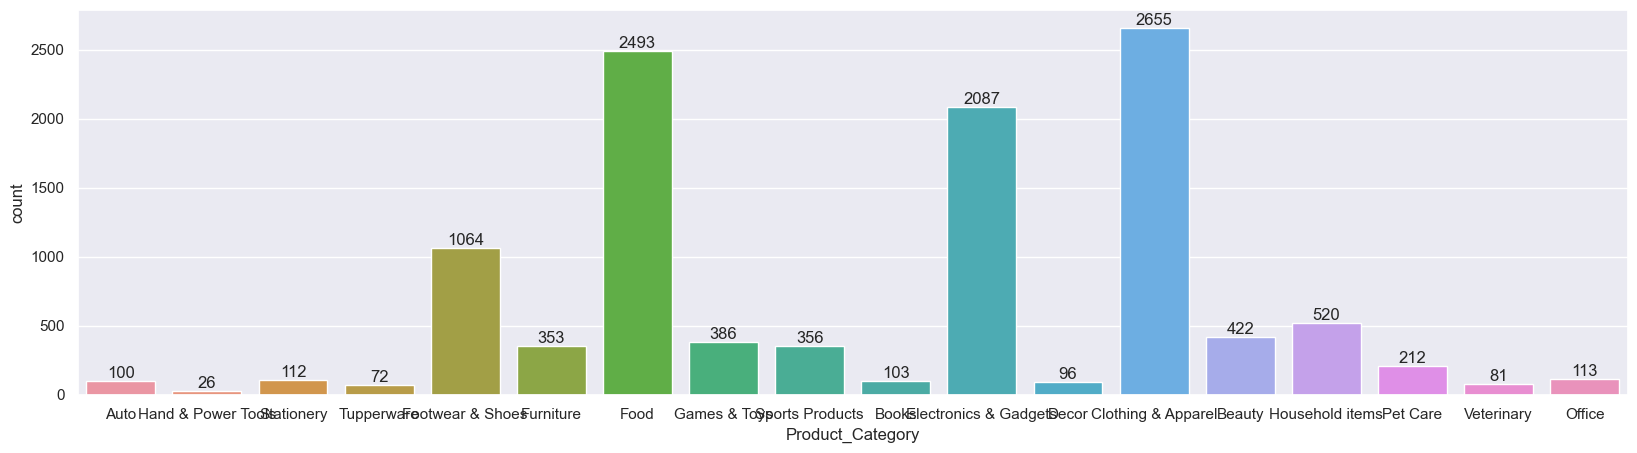

In [35]:
# countplot of Product Category column
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(x = 'Product_Category', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

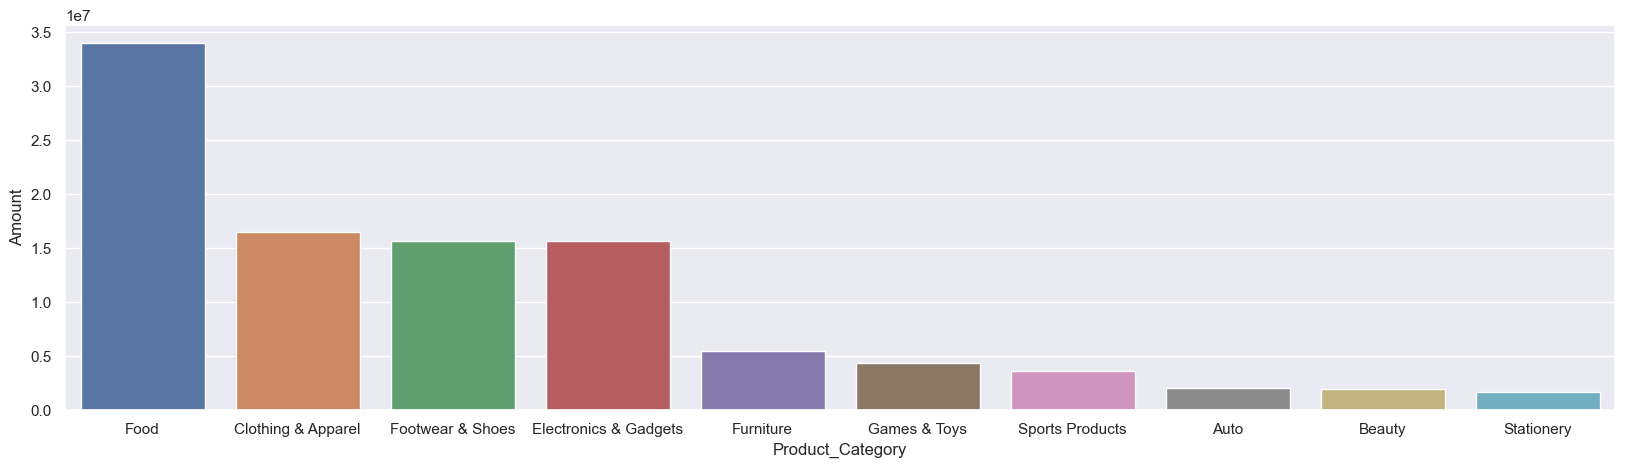

In [36]:
# Amount of sale according to Product Category
sales_productCat = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (20,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_productCat)

*From above graph we can say that most of the sold products are from Food, Clothing and Electronics & Gadgets category*

In [37]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Product ID

<Axes: xlabel='Product_ID', ylabel='Orders'>

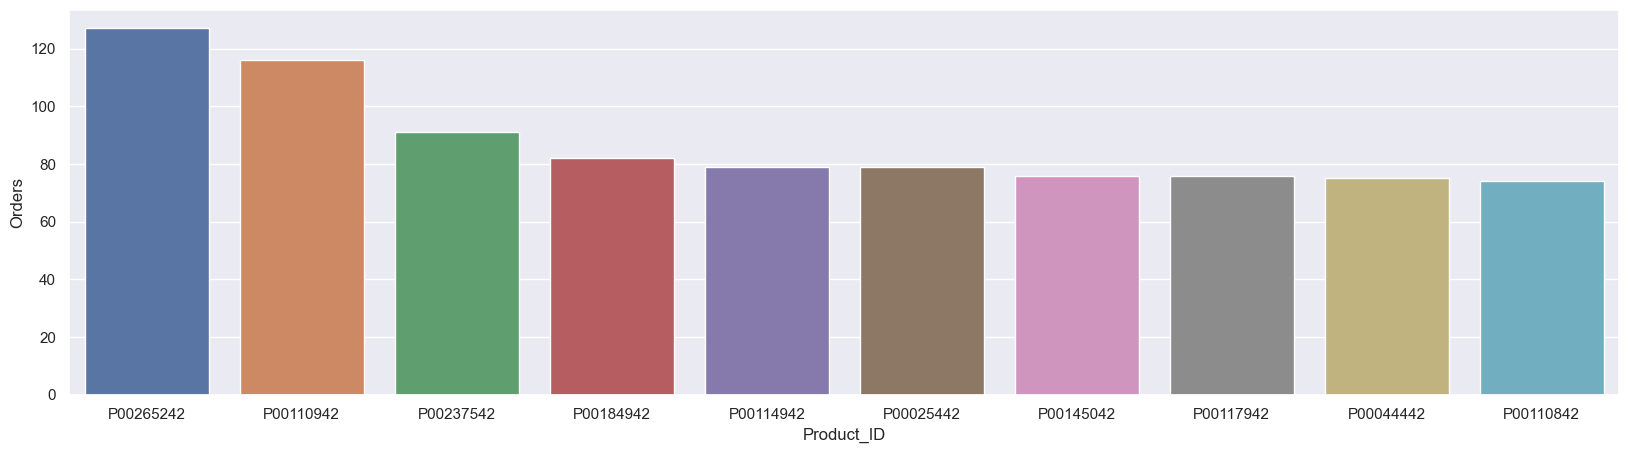

In [38]:
# Calculating Orders for Product ID
sales_productID = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (20,5)})
sns.barplot(x = 'Product_ID', y = 'Orders', data = sales_productID)

<Axes: xlabel='Product_ID', ylabel='Amount'>

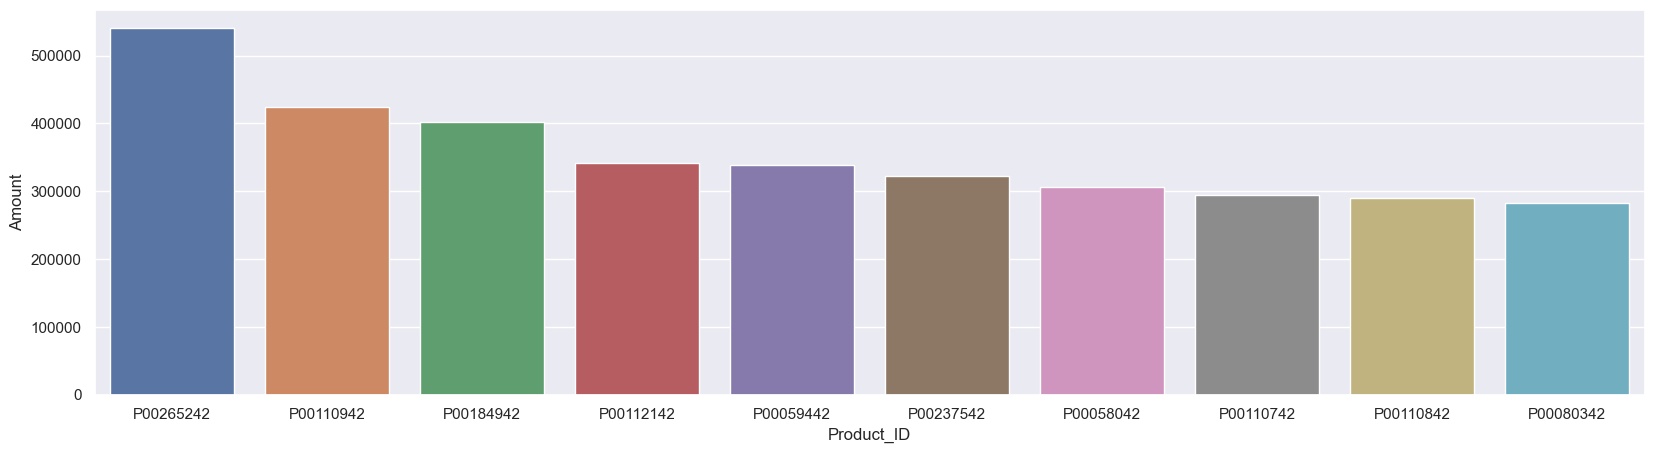

In [39]:
# Calculating Amount for Product ID
sales_productID = df.groupby(['Product_ID'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (20,5)})
sns.barplot(x = 'Product_ID', y = 'Amount', data = sales_productID)

*As shown in above two graphs, product ID's -- POO265242, POO110942 are the two most selling products with respect to total Amount and total number of Orders.*

## Summary

*The dataset predominantly revolves around sales data, with special attention to demographics such as gender, age, state, marital status, and occupation. Through the analysis, it's evident that female buyers, especially those aged between 26-35, dominate in purchasing power. States like Uttar Pradesh, Maharashtra, and Karnataka are key contributors to sales, and the IT sector, Healthcare, and Aviation occupations stand out in purchasing behavior.
*

## Insights for client

*Target Demographics: Focus marketing and sales strategies on females, particularly those in the 26-35 age group, as they demonstrate the highest     purchasing power.*

*Regional Strategies: Prioritize promotional activities in Uttar Pradesh, Maharashtra, and Karnataka, given their significant contribution to sales.*

*Occupational Focus:     Tailor marketing campaigns towards professionals in the IT sector, Healthcare, and Aviation, as they show increased buying 
                        behavior.*

*Product Prioritization: Emphasize sales and promotions on products from the Food, Clothing, and Electronics & Gadgets categories, given their                                   popularity.*

*Average Spending: With an average spending of 9460 per order, consider introducing loyalty programs or discounts at strategic price points around this figure to increase the order value.*

*Order Frequency: As the average customer places approximately 2.5 orders, consider strategies like bulk discounts or combo offers to increase this number.*